### Task 4: Linear Dataset

#### Importing libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### Loading datasets

In [11]:
df1 = pd.read_csv("../Datasets/LinearDataset/Class1.txt",delimiter=' ', header=None)
df2 = pd.read_csv("../Datasets/LinearDataset/Class2.txt",delimiter=' ', header=None)
df3 = pd.read_csv("../Datasets/LinearDataset/Class3.txt",delimiter=' ', header=None)

#### Dividing training and testing data

In [12]:
df1_train = df1[:int(len(df1)*0.7)]
df1_test = df1[int(len(df1)*0.7):]
df2_train = df2[:int(len(df2)*0.7)]
df2_test = df2[int(len(df2)*0.7):]
df3_train = df3[:int(len(df3)*0.7)]
df3_test = df3[int(len(df3)*0.7):]

#### Perceptron classifier

Accuracy: 0.9977777777777778
Precision per class: [1.         0.99337748 1.        ]
Recall per class: [1.         1.         0.99333333]
F1 Score per class: [1.         0.99667774 0.99665552]
Confusion Matrix:
 [[150   0   0]
 [  0 150   0]
 [  0   1 149]]


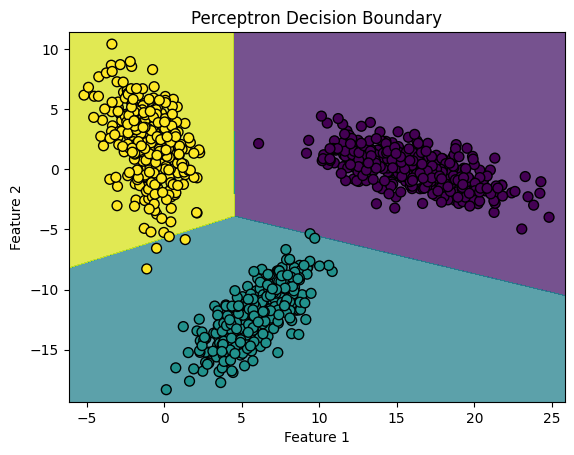

In [13]:
# Assuming df1, df2, and df3 are your class dataframes
# Combine the data (you should update this to match your LS dataset)
X = pd.concat([df1_train, df2_train, df3_train], axis=0).values  # Using the train data
y = np.array([0]*len(df1_train) + [1]*len(df2_train) + [2]*len(df3_train))  # Labels for 3 classes

# Train the Perceptron model
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X, y)

# Make predictions on the test data
X_test = pd.concat([df1_test, df2_test, df3_test], axis=0).values
y_test = np.array([0]*len(df1_test) + [1]*len(df2_test) + [2]*len(df3_test))

y_pred = model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision per class:", precision)
print("Recall per class:", recall)
print("F1 Score per class:", f1)
print("Confusion Matrix:\n", cm)

# Decision Boundary Plot
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.75)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plotting decision boundary for Perceptron classifier
plot_decision_boundary(X, y, model, title="Perceptron Decision Boundary")

